# Train a LSTM on sine wave data

Let's explain the code below. 

First we import our usual libraries. To generate the sine wave training data, we generate random integers and pass them through `np.sin`.

In [3]:
import random
import numpy as np
import torch
from torch import nn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import torch.optim as optim

#set seed to be able to replicate the resutls
seed = 172
random.seed(seed)
torch.manual_seed(seed)

def generate_sin_wave_data():
    T = 20
    L = 1000
    N = 200

    x = np.empty((N, L), 'int64')
    x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
    data = np.sin(x / 1.0 / T).astype('float64')

    return data


The model consists of two LSTM cells as we already mentioned. The first cell receives an input of length 1 and has an output of length 51 while the second one receives an input of length 51 and has an output of length 1.

Have a closer look in the `forward` method. Did you noticed that we can generate future predictions? The first for-loop runs on all data points in the input data. The second for loop recieves that last data point and tries to generate new ones for the next time step.

For each training epoch, we train the model and then we generate 1000 new data points.

After each epoch, we plot the predicted data points to visualize our results.

STEP:  0
loss: 0.5011488260470791
loss: 0.4983412000493302
loss: 0.1898659461528443
loss: 0.4313416983654409
loss: 0.03799853359431595
loss: 0.030818150195148455
loss: 0.026551876922506913
loss: 0.025992410405506008
loss: 0.025568208011896472
loss: 0.015000944633015637
loss: 0.009754404271152387
loss: 0.004367555155451874
loss: 0.002603994262552611
loss: 0.0010319847087485693
loss: 0.0005542930996870073
loss: 0.00047813634387110454
loss: 0.00046547283499502037
loss: 0.0004365991547401556
loss: 0.0004151021140988081
loss: 0.0004043250706430139
test loss: 0.000522775011640102


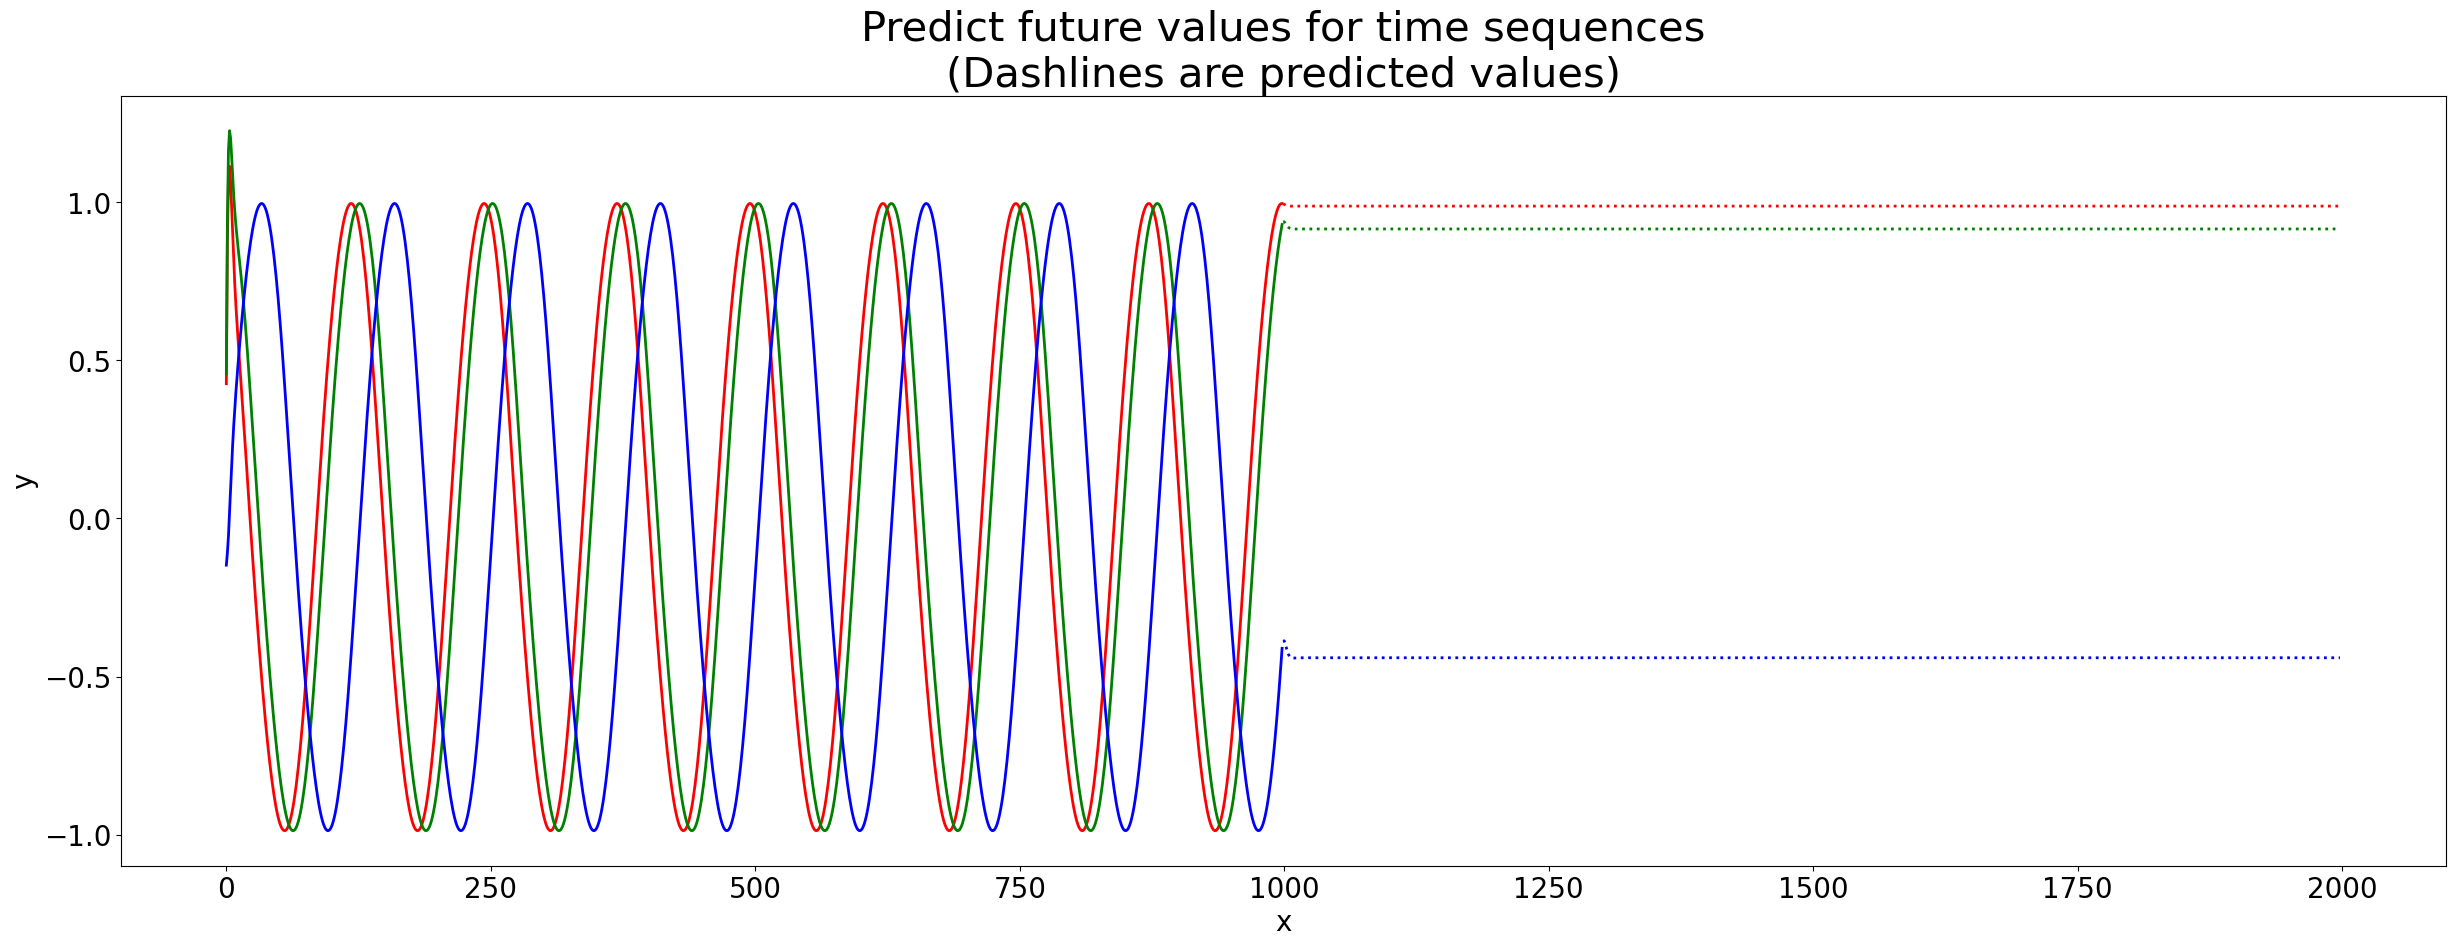

STEP:  1
loss: 0.000391967137200359
loss: 0.00037471520711846655
loss: 0.0003460222263241081
loss: 0.0003127907090813429
loss: 0.0002836473725028127
loss: 0.0002599962750790701
loss: 0.00024708980104622635
loss: 0.0002320998428596657
loss: 0.00022485227904431277
loss: 0.0002206770332078724
loss: 0.00021596942190942717
loss: 0.0001989133250492356
loss: 0.00018989626847962745
loss: 0.00018173194481005682
loss: 0.00017712180470332744
loss: 0.00017223010066274268
loss: 0.0001659746679344649
loss: 0.0001574146704434021
loss: 0.00014894716857615032
loss: 0.00014446435189382912
test loss: 0.00015564621033850704


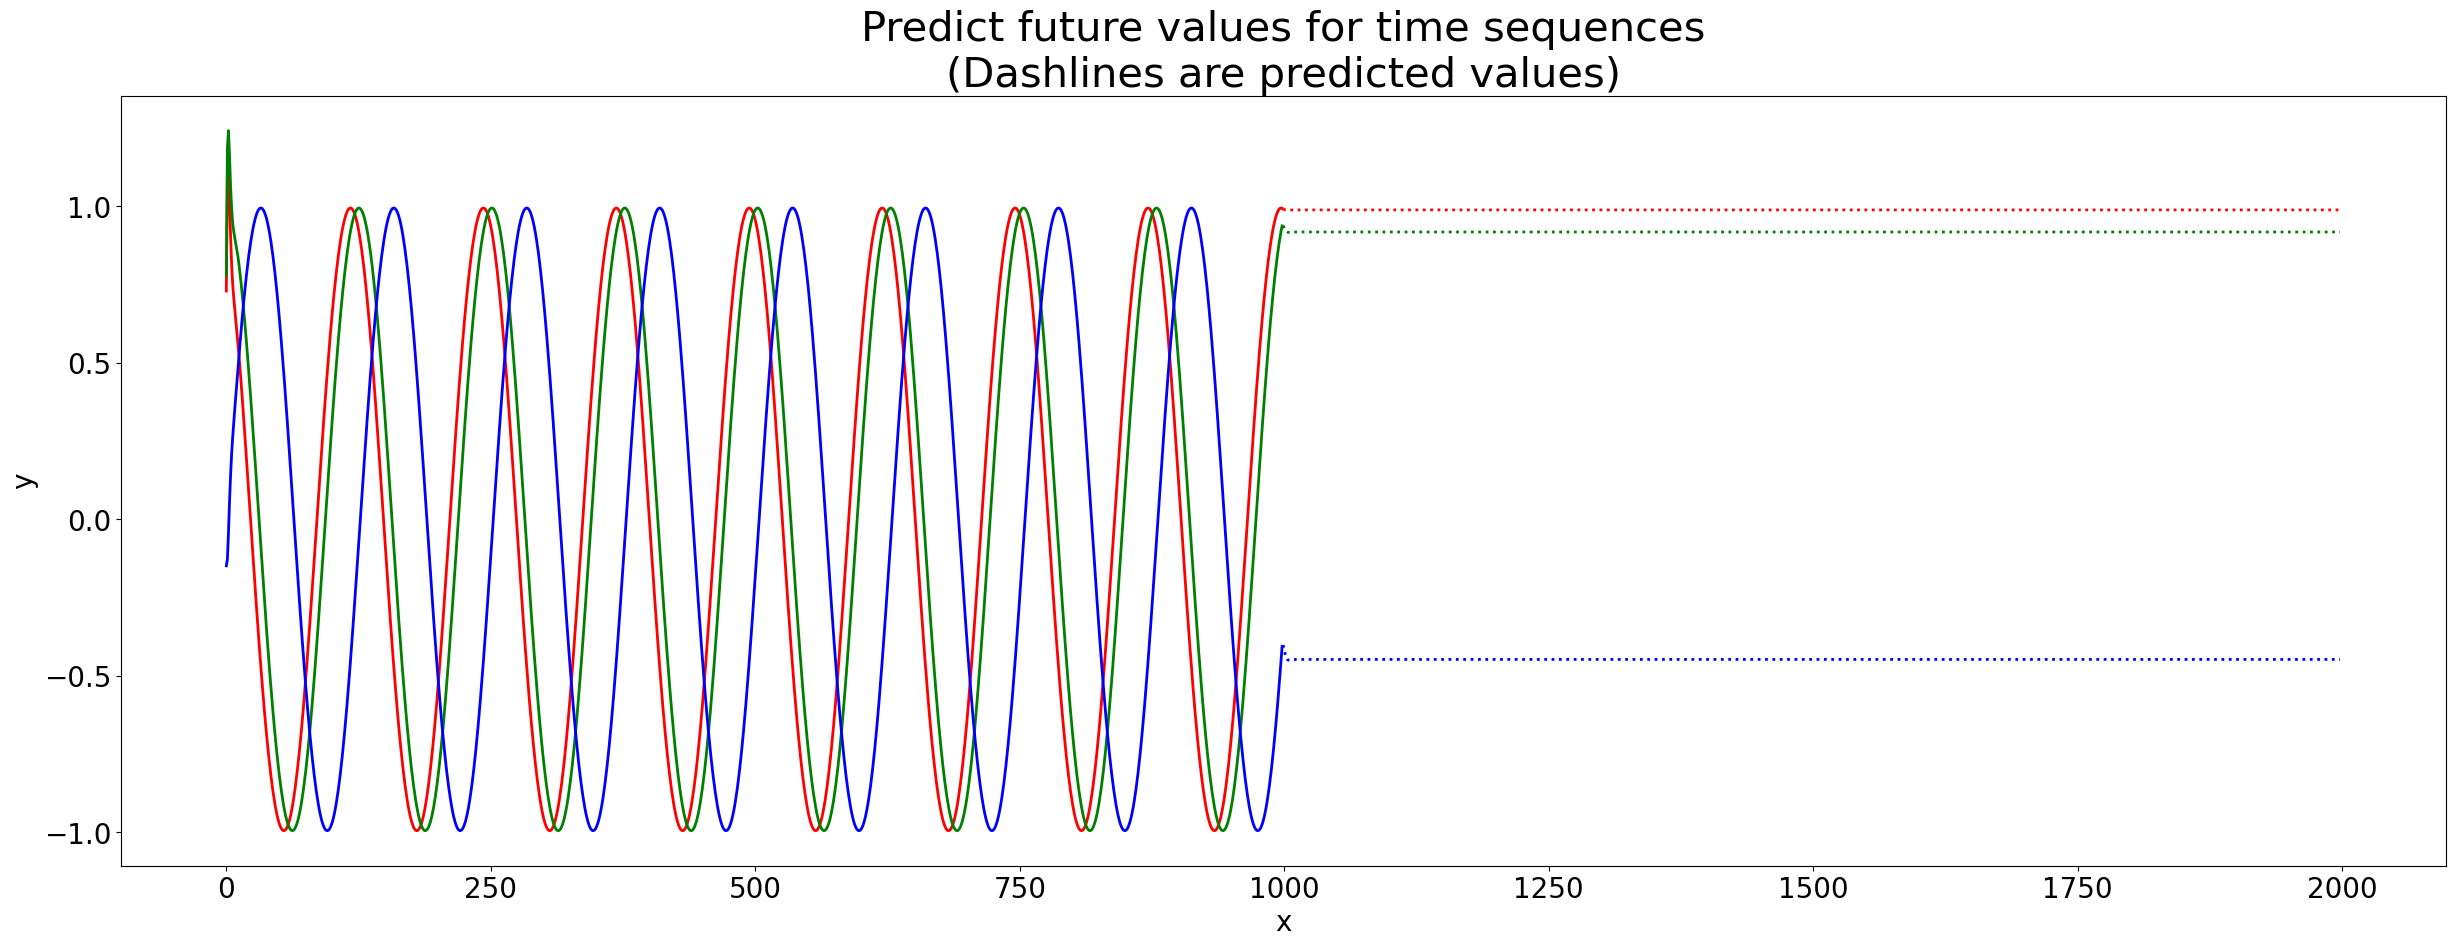

STEP:  2
loss: 0.0001400458072878079
loss: 0.00013869252185671295
loss: 0.00013050983019749021
loss: 0.00012617197566814944
loss: 0.00011578471951179654
loss: 0.00011176017357786047
loss: 0.00010676295534893336
loss: 0.00010315602856176999
loss: 9.98930395098116e-05
loss: 9.772964681506871e-05
loss: 9.656961724347297e-05
loss: 9.598525129258289e-05
loss: 9.543736411106246e-05
loss: 9.436719625091098e-05
loss: 9.21888853901908e-05
loss: 8.785306047204893e-05
loss: 8.933652426514234e-05
loss: 8.281237576545451e-05
loss: 8.111497141454233e-05
loss: 7.693562394949806e-05
test loss: 7.111533624228976e-05


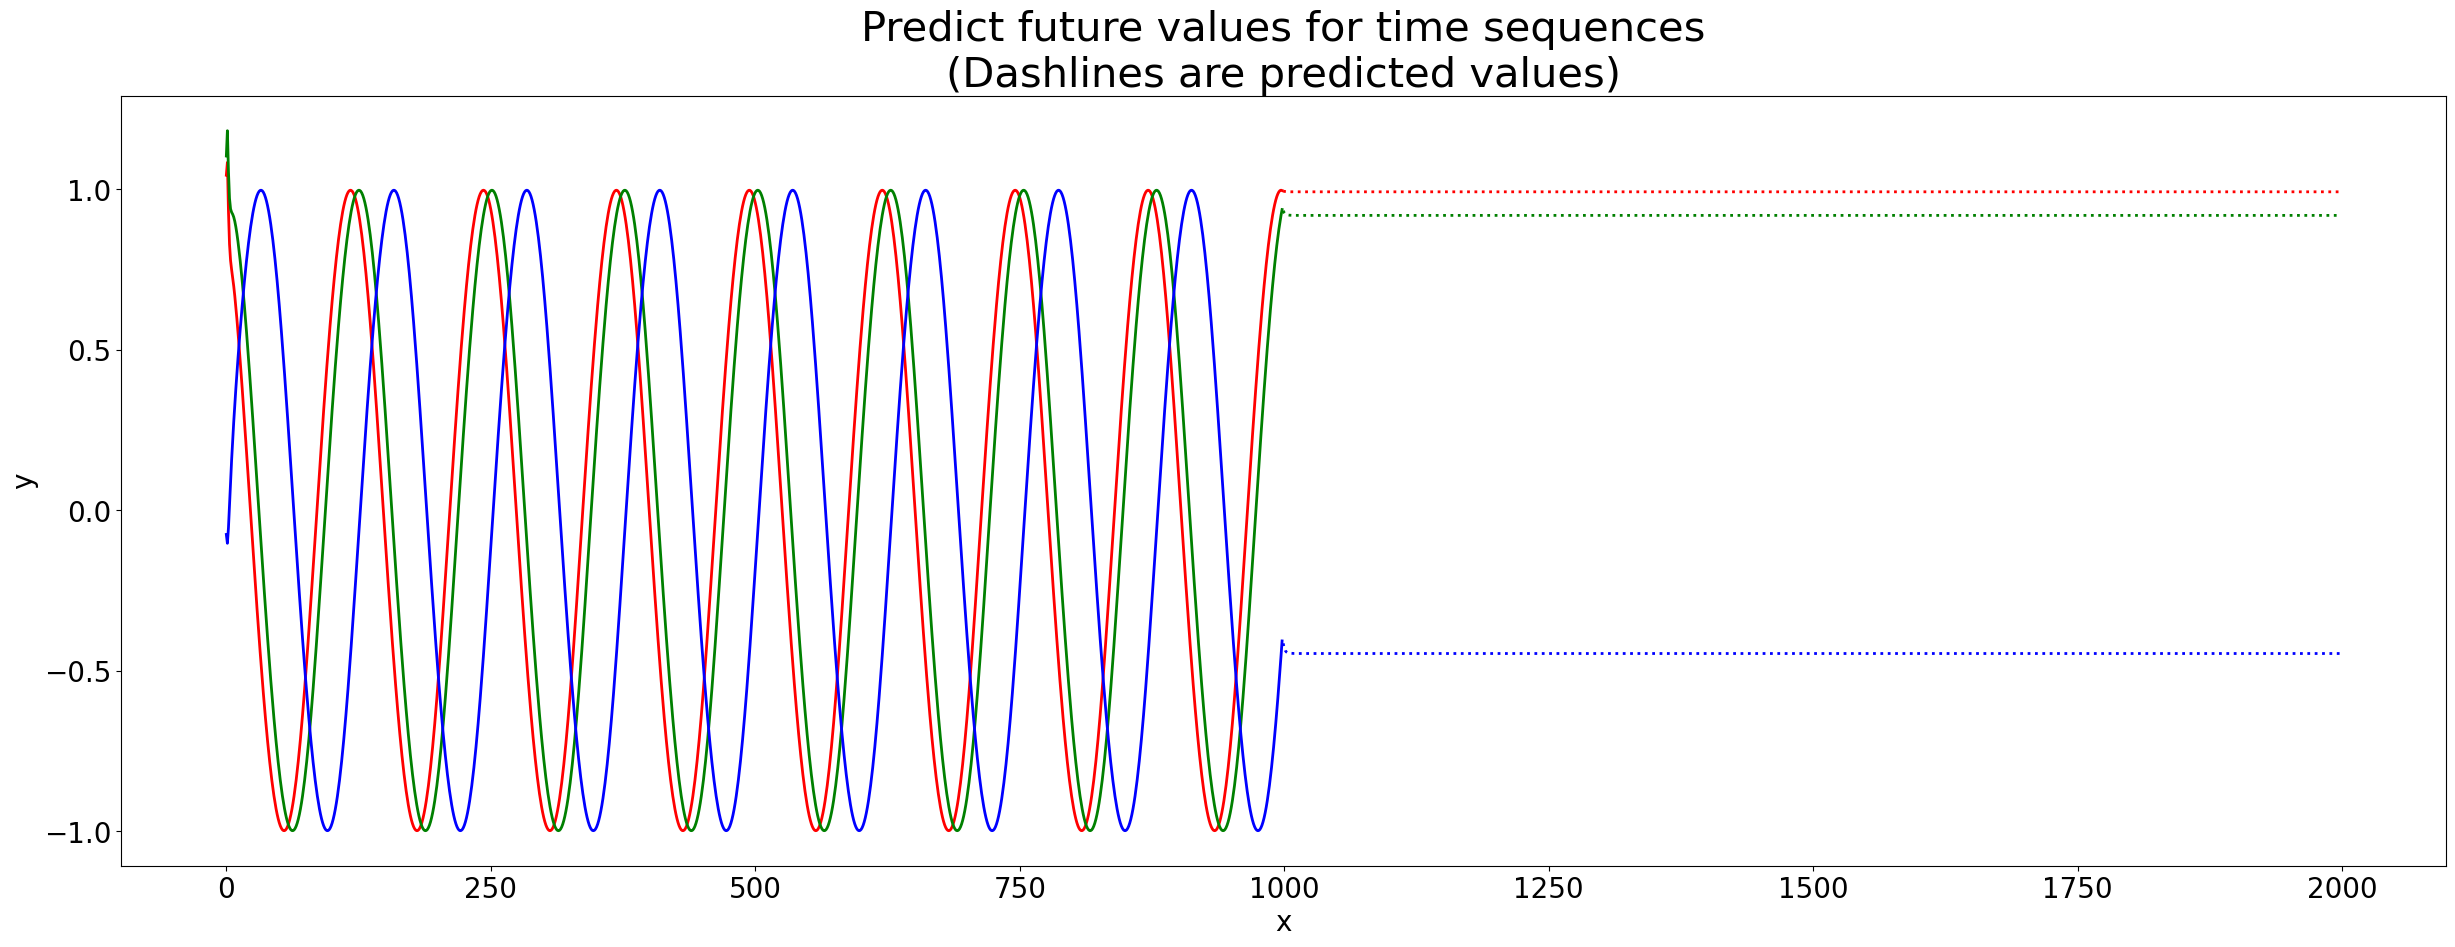

STEP:  3
loss: 7.241436095669132e-05
loss: 6.905968512800067e-05
loss: 6.468261891591676e-05
loss: 6.37640946789146e-05
loss: 6.34874409938689e-05
loss: 6.327183344182558e-05
loss: 6.304608891244e-05
loss: 6.26805916064586e-05
loss: 6.2100890096002e-05
loss: 6.130223086682096e-05
loss: 6.009641766927589e-05
loss: 5.913509853060817e-05
loss: 5.946431868833919e-05
loss: 5.8602009384067185e-05
loss: 5.8488384014125166e-05
loss: 5.82889501706808e-05
loss: 5.7974427725915075e-05
loss: 5.743159712331476e-05
loss: 5.608511717731488e-05
loss: 5.248811073082116e-05
test loss: 5.710951418872028e-05


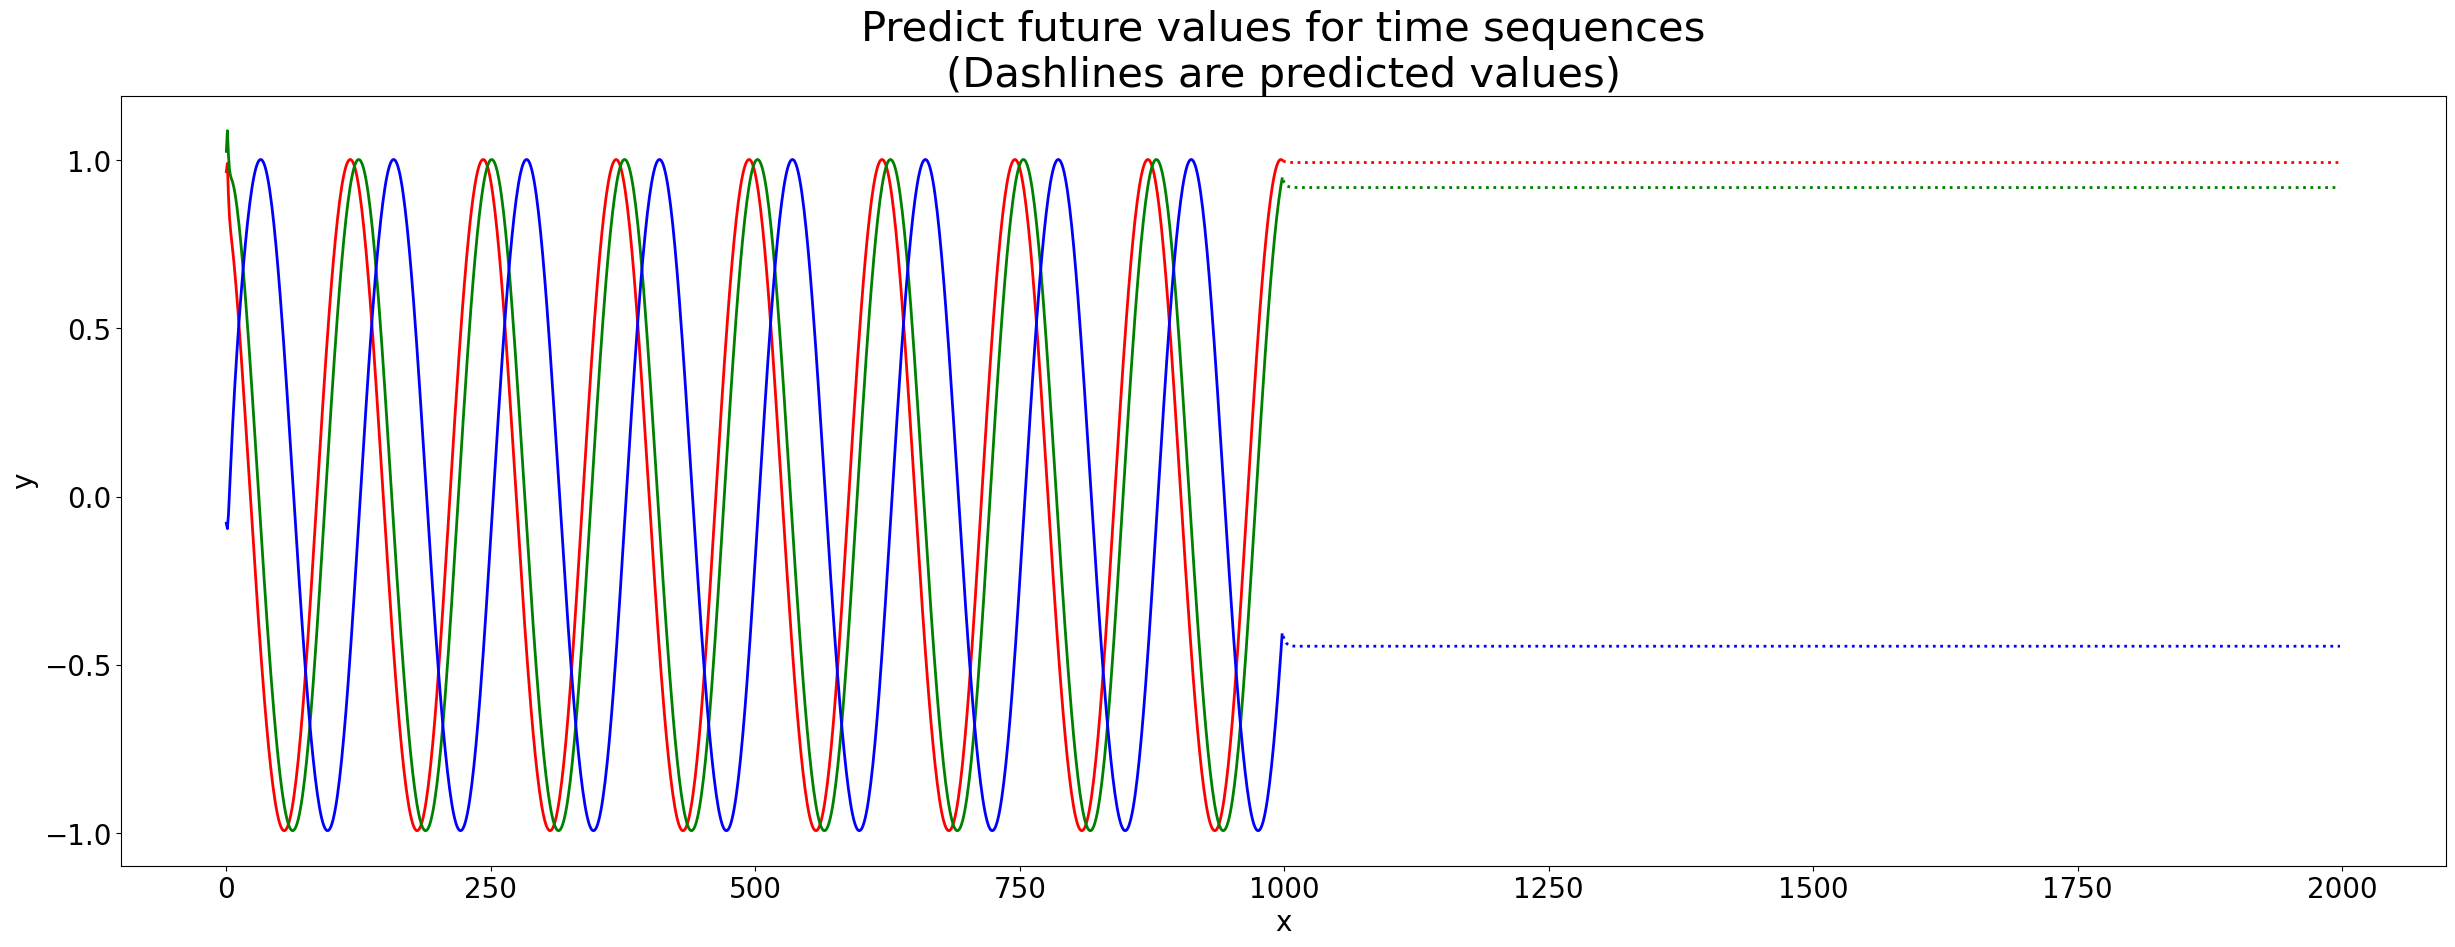

STEP:  4
loss: 5.3545887347076856e-05
loss: 4.8920874985543736e-05
loss: 4.534613215559311e-05
loss: 4.1873282754415744e-05
loss: 3.5180819569597245e-05
loss: 2.9153627948729463e-05
loss: 2.7598611056392835e-05
loss: 2.525462539288741e-05
loss: 2.1659712863768805e-05
loss: 2.0463191030468893e-05
loss: 1.9747107760697778e-05
loss: 1.880996351871573e-05
loss: 2.5894244695730715e-05
loss: 1.664034374840662e-05
loss: 1.6218200634993712e-05
loss: 1.5220688144355587e-05
loss: 1.5050022971521752e-05
loss: 1.4846563863334474e-05
loss: 1.4798661989959606e-05
loss: 1.4774929568186756e-05
test loss: 1.49910211759306e-05


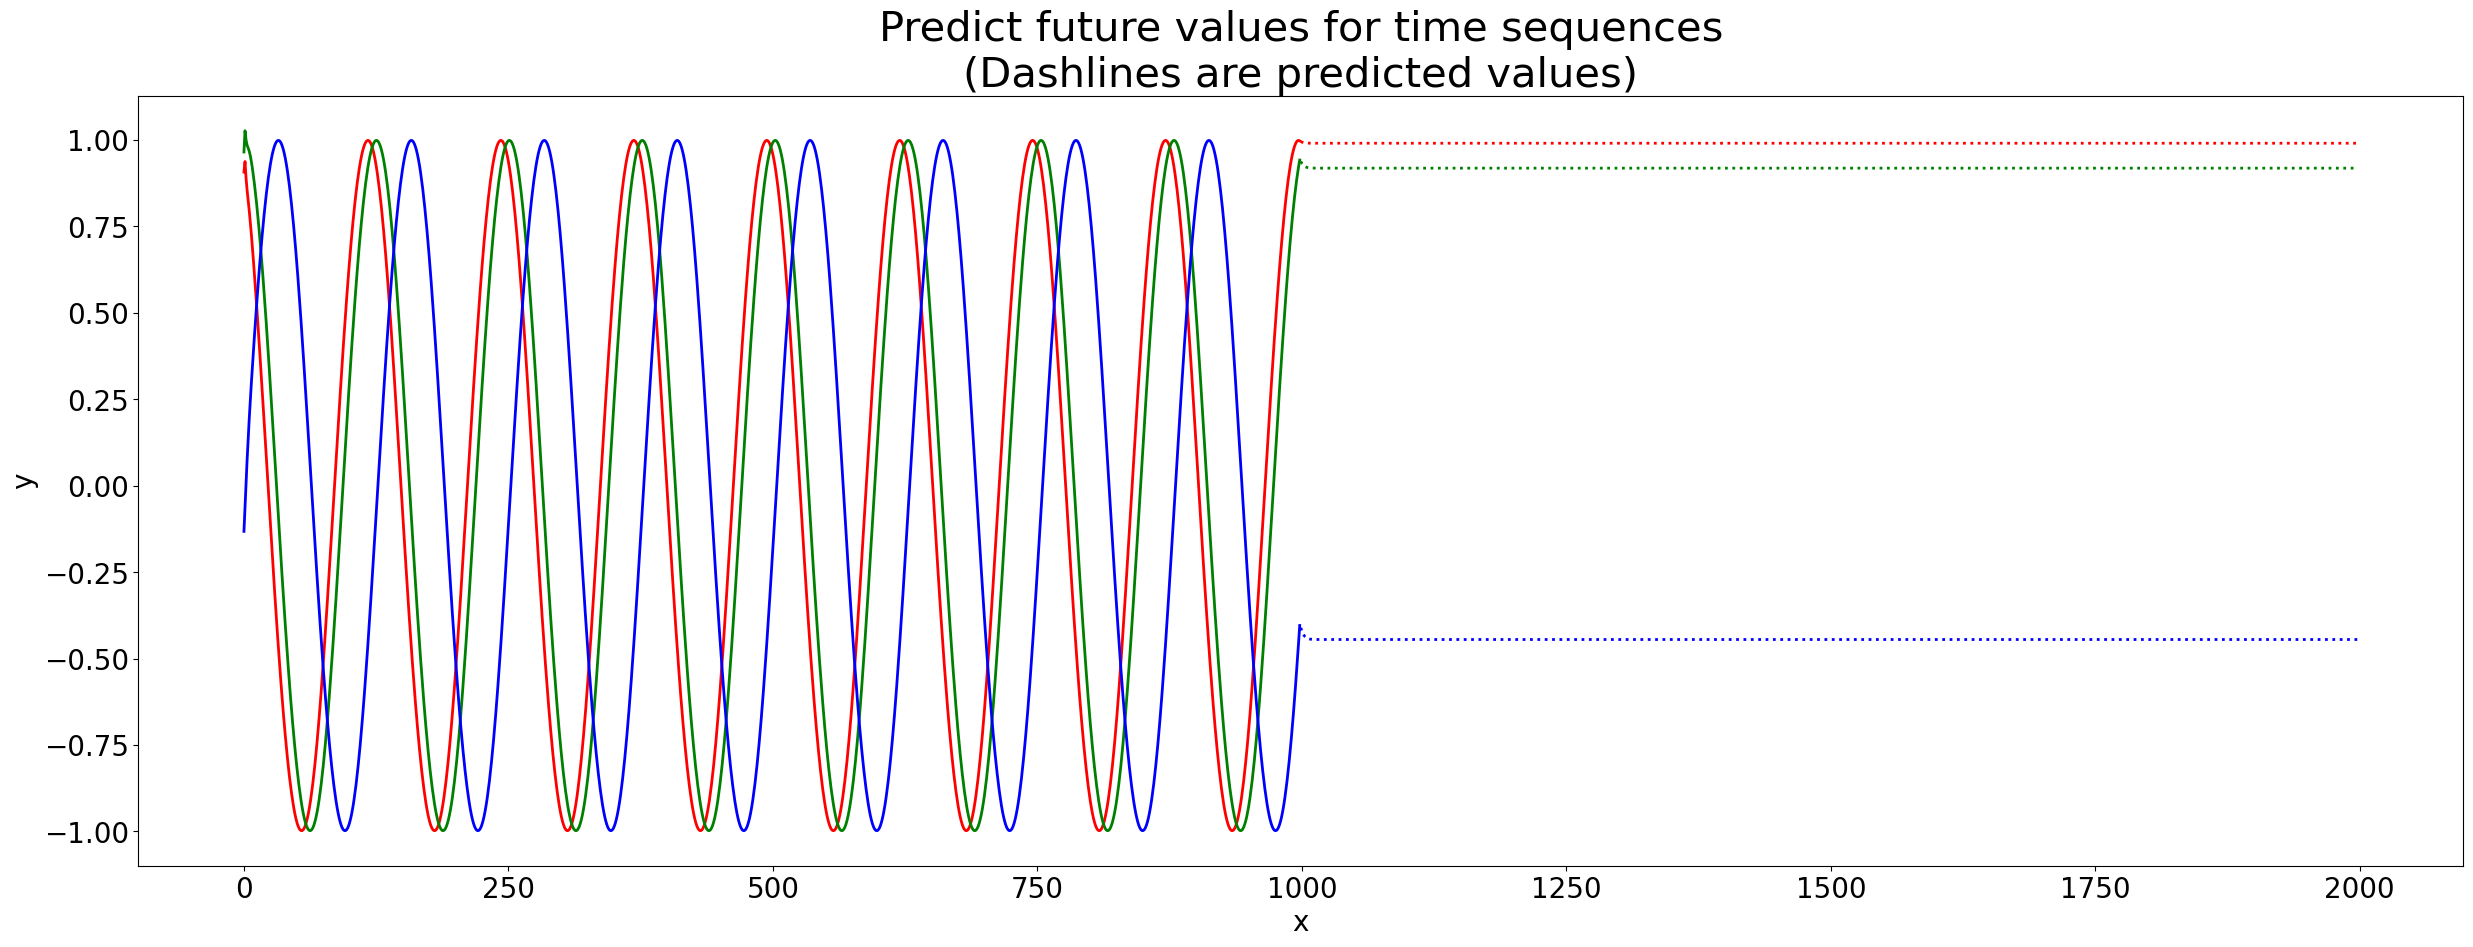

STEP:  5
loss: 1.4692066662452216e-05
loss: 1.428176094932941e-05
loss: 1.3801752565013435e-05
loss: 1.3049146781826526e-05
loss: 1.2379910078495045e-05
loss: 1.1648537014243574e-05
loss: 1.1080243105878123e-05
loss: 1.086679461825893e-05
loss: 1.0836401277861989e-05
loss: 1.0807386044827438e-05
loss: 1.0685258712580132e-05
loss: 1.0407908882957125e-05
loss: 9.708899437007964e-06
loss: 9.604667247682565e-06
loss: 8.968538931067038e-06
loss: 8.756469249675211e-06
loss: 8.475277746525484e-06
loss: 8.292929620218104e-06
loss: 8.162422486260109e-06
loss: 7.975263967213453e-06
test loss: 8.433805871642388e-06


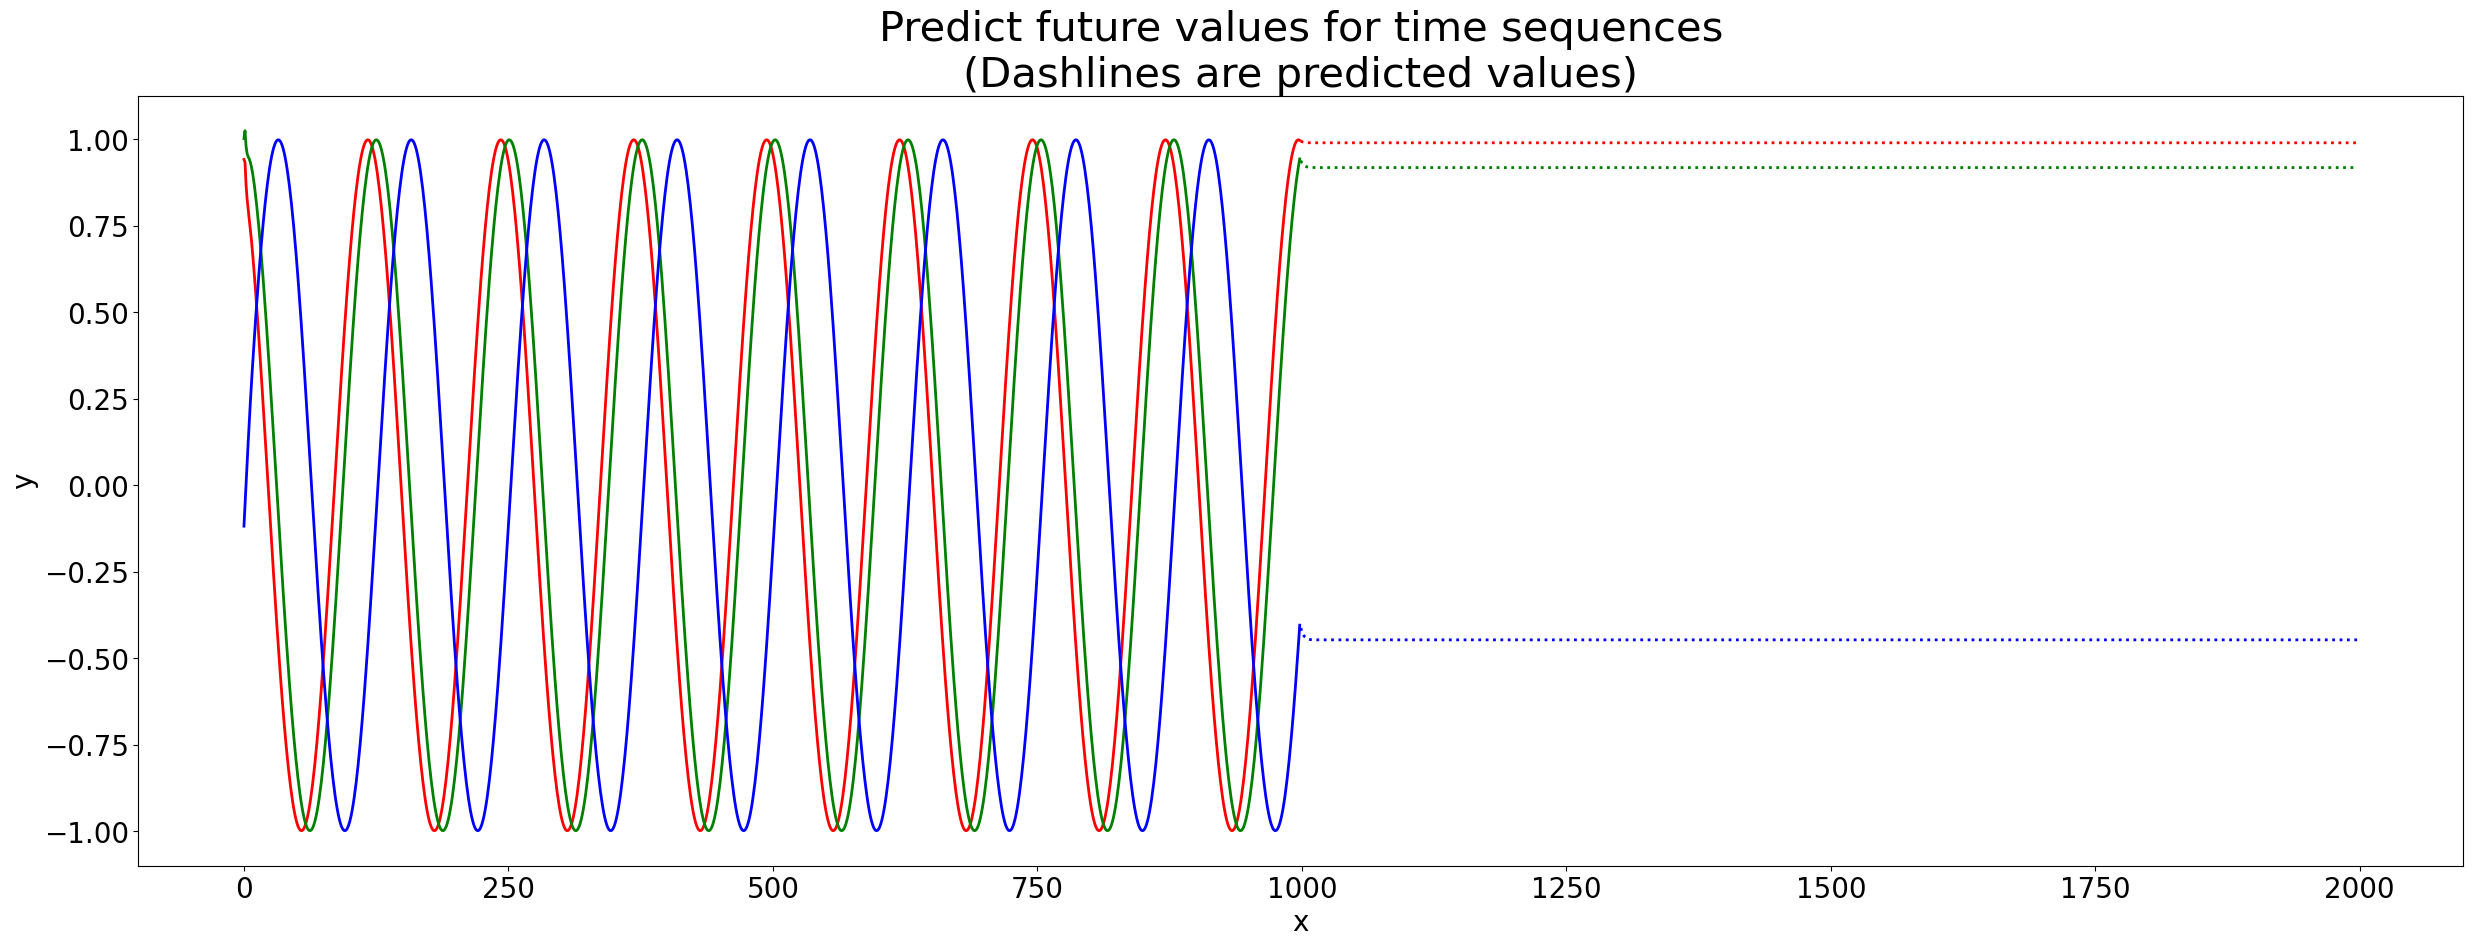

STEP:  6
loss: 7.916443373449107e-06
loss: 7.879171718296062e-06
loss: 7.857785419568028e-06
loss: 7.850252098501679e-06
loss: 7.845973583665742e-06
loss: 7.840824185819229e-06
loss: 7.83090942931372e-06
loss: 7.812299106034407e-06
loss: 7.785605728420597e-06
loss: 7.743448630060727e-06
loss: 7.678649901717874e-06
loss: 7.578910416796056e-06
loss: 7.4164380270457125e-06
loss: 7.282290938235823e-06
loss: 7.16478204631119e-06
loss: 6.964022365744753e-06
loss: 6.834319518042392e-06
loss: 6.313661732239497e-06
loss: 6.159373173156794e-06
loss: 5.936941527060488e-06
test loss: 7.178211404428714e-06


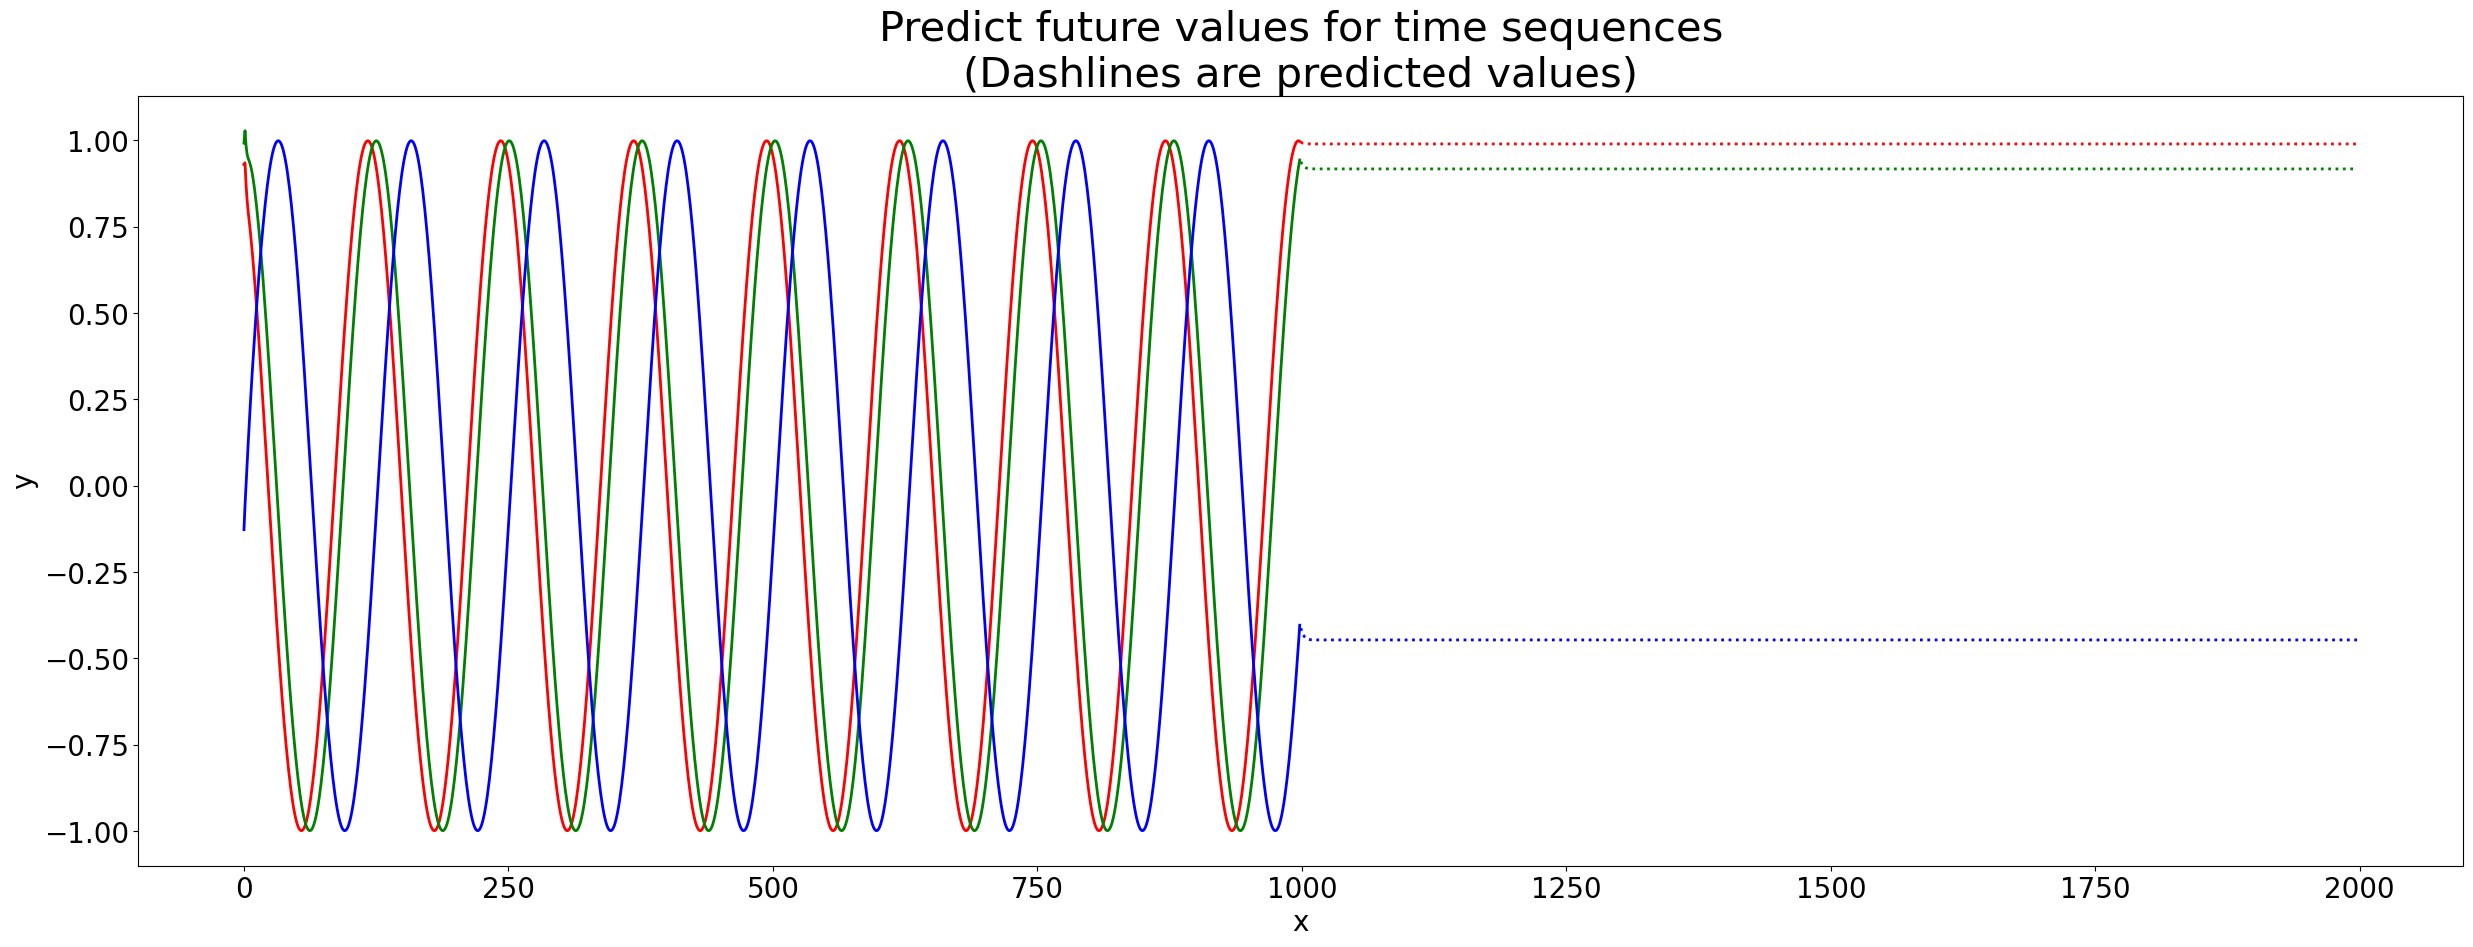

STEP:  7
loss: 5.842890398397019e-06
loss: 5.735051435956435e-06
loss: 5.664604761811662e-06
loss: 5.648340744651939e-06
loss: 5.641194176767961e-06
loss: 5.637564482675271e-06
loss: 5.632454982620347e-06
loss: 5.628051840063631e-06
loss: 5.624885923991619e-06
loss: 5.620985469431319e-06
loss: 5.612763673567476e-06
loss: 5.595275976533678e-06
loss: 5.5589271471409104e-06
loss: 5.489228257945517e-06
loss: 5.3743508714281226e-06
loss: 5.243416846939234e-06
loss: 5.187761180709888e-06
loss: 5.23566008011349e-06
loss: 5.168855052099855e-06
loss: 5.1626708509239135e-06
test loss: 5.763948101959004e-06


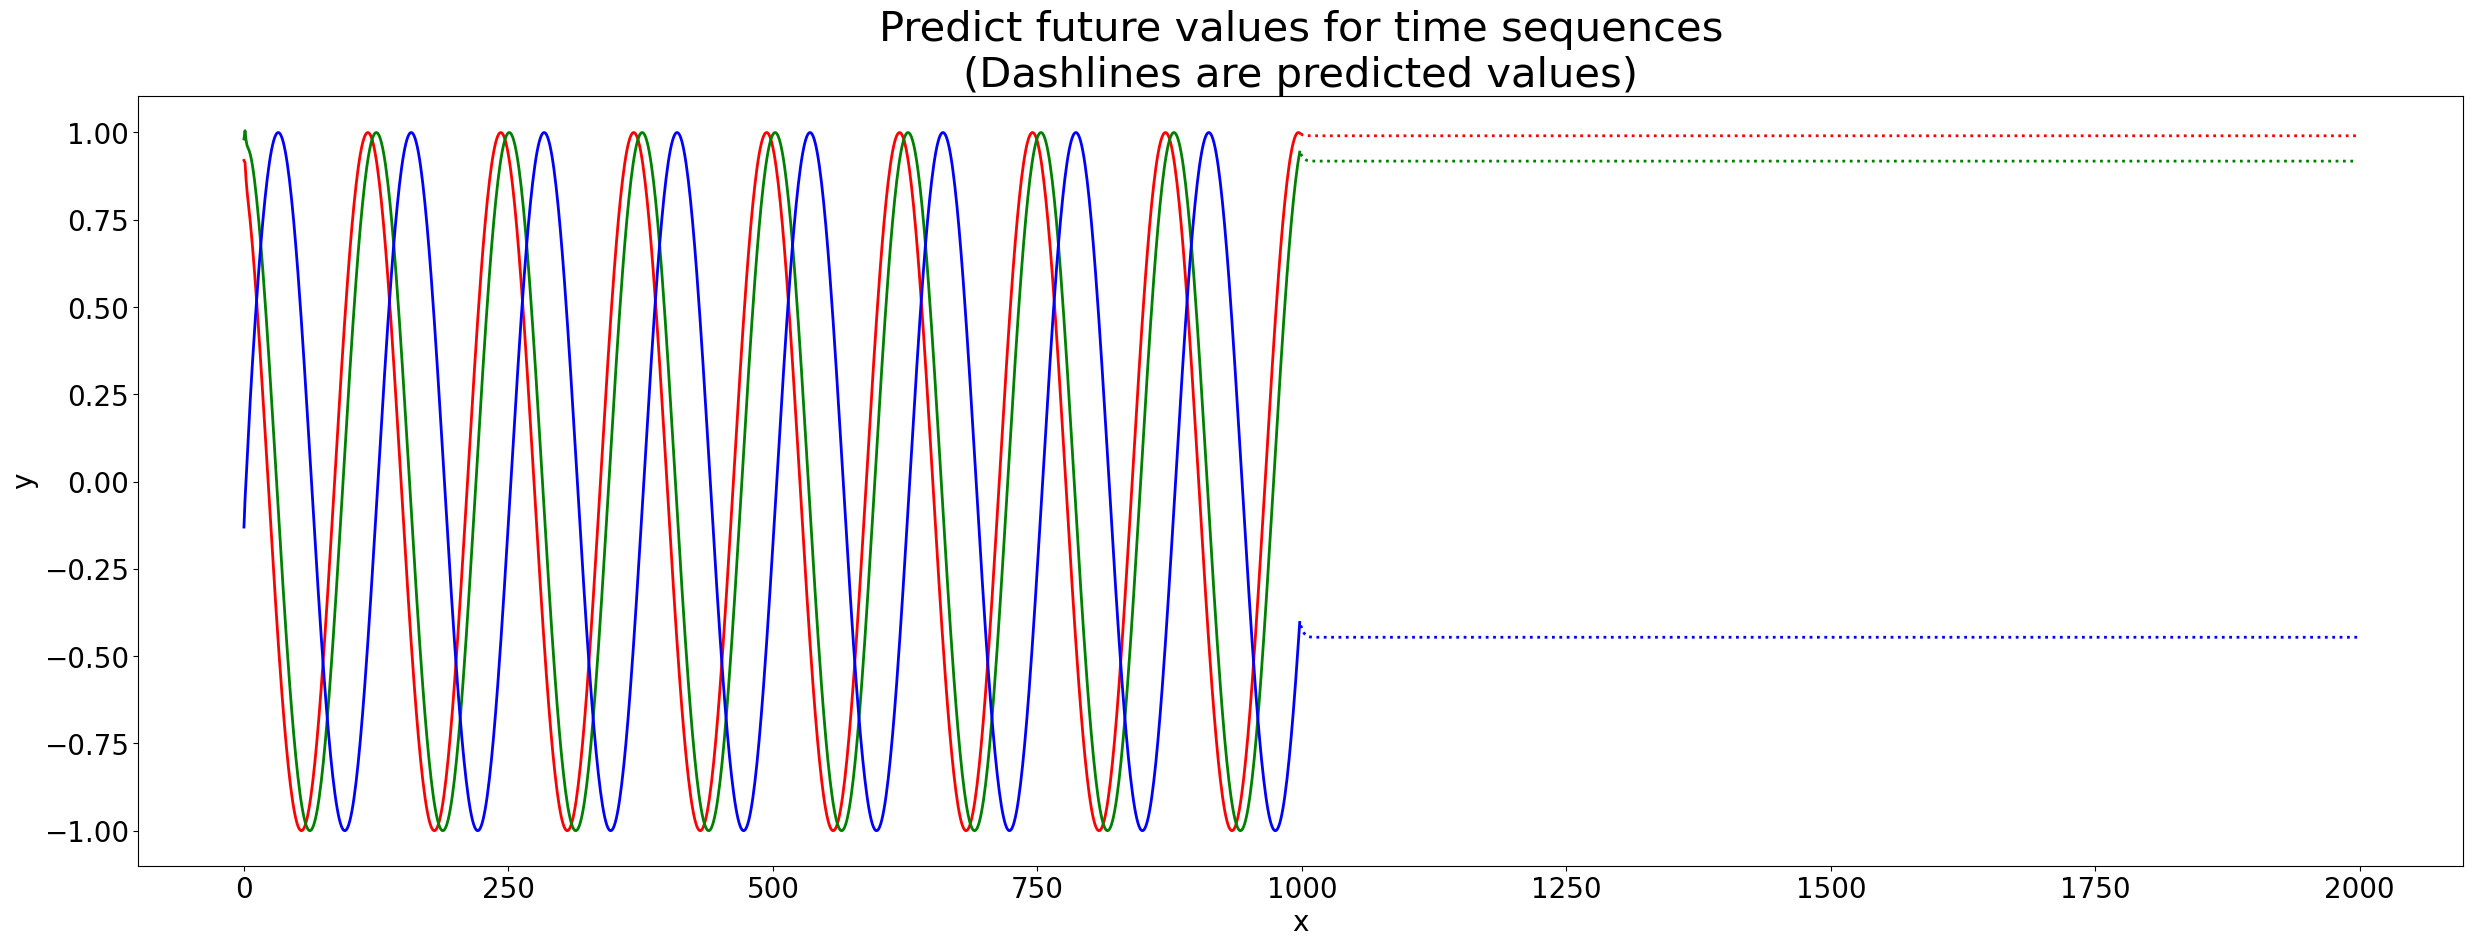

STEP:  8
loss: 5.158904879492533e-06
loss: 5.155193163965273e-06
loss: 5.148961002825756e-06
loss: 5.132794375308116e-06
loss: 5.098301852353288e-06
loss: 5.041331148330149e-06
loss: 4.952082739761863e-06
loss: 4.931332676658927e-06
loss: 4.852722932739646e-06
loss: 4.834842756622348e-06
loss: 4.814979703277773e-06
loss: 4.806247873409717e-06
loss: 4.8019657410993655e-06
loss: 4.7926008299460215e-06
loss: 4.779295799083938e-06
loss: 4.764068425734749e-06
loss: 4.748483927564243e-06
loss: 4.73002186754033e-06
loss: 4.721610063633451e-06
loss: 4.705416932011959e-06
test loss: 5.97401149122329e-06


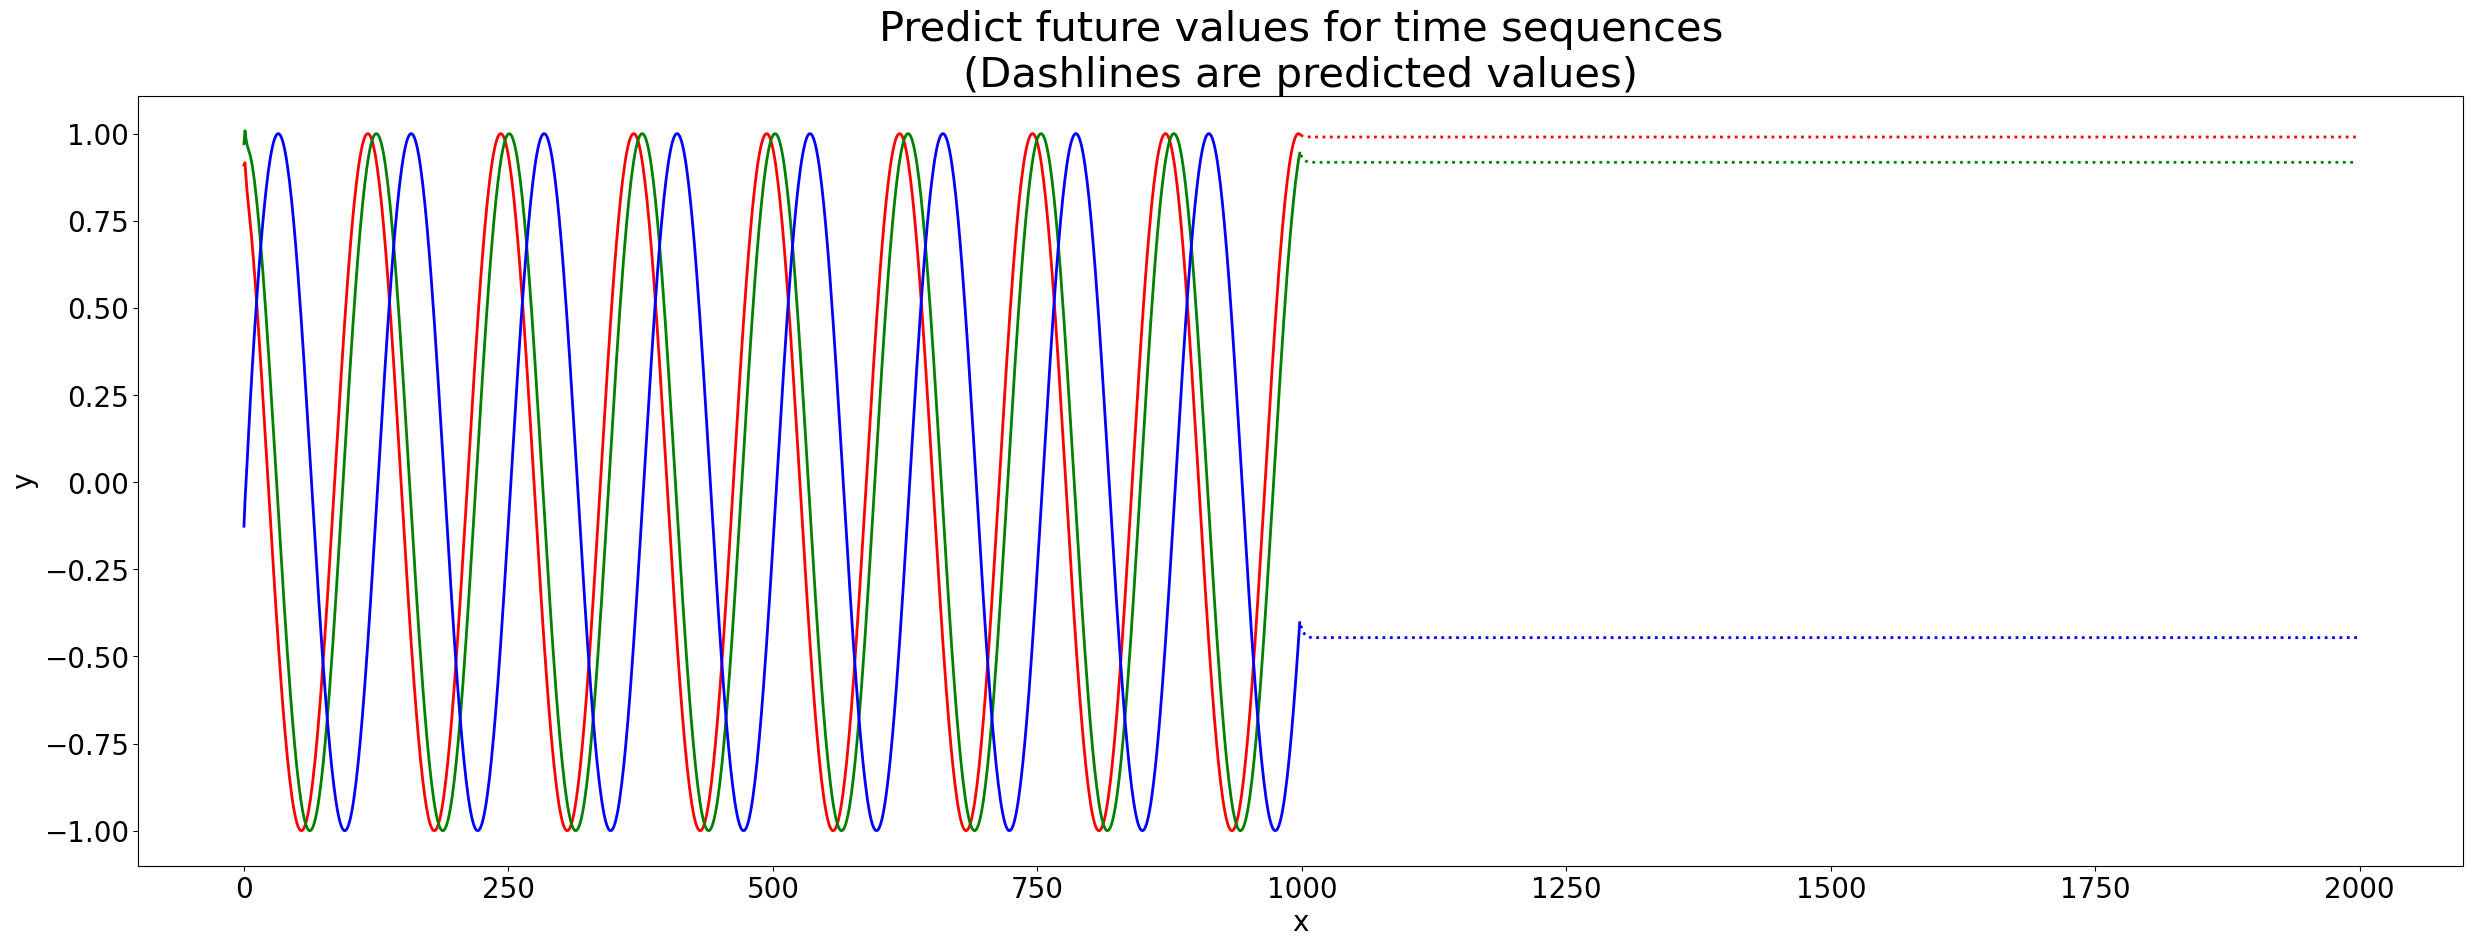

STEP:  9
loss: 4.697004677933347e-06
loss: 4.682136923633591e-06
loss: 4.670924162103728e-06
loss: 4.6607157924748575e-06
loss: 4.6494956009588975e-06
loss: 4.636581301817582e-06
loss: 4.630638900965904e-06
loss: 4.624965492252707e-06
loss: 4.618791669422222e-06
loss: 4.608217886073383e-06
loss: 4.592769812713501e-06
loss: 4.576249773593687e-06
loss: 4.57115559739812e-06
loss: 4.563997083999878e-06
loss: 4.557549576748223e-06
loss: 4.5470803109179025e-06
loss: 4.53893113402891e-06
loss: 4.5383437951521965e-06
test loss: 6.3929702664599295e-06


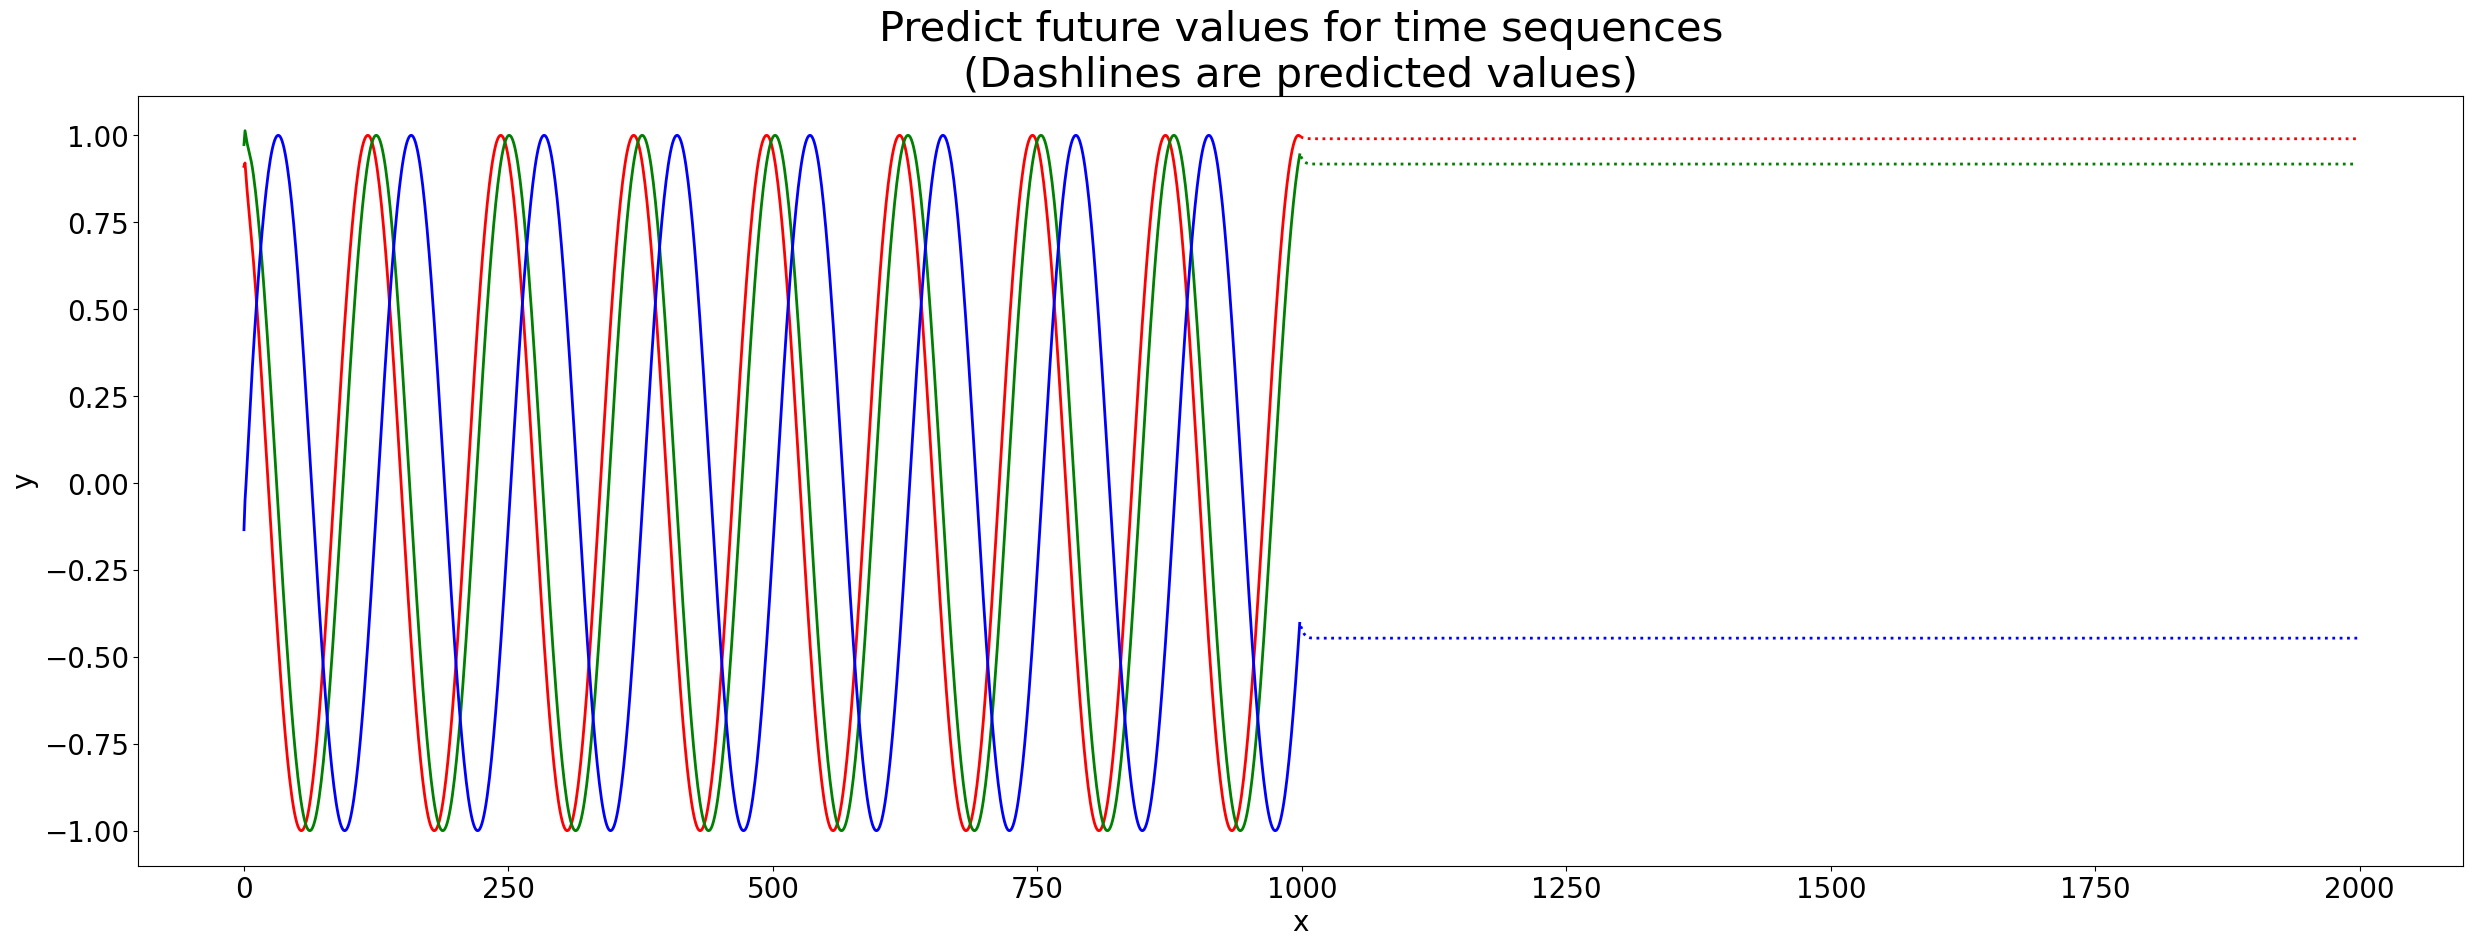

In [4]:
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()

        self.rnn1 = nn.LSTMCell(1, 51)
        self.rnn2 = nn.LSTMCell(51, 51)

        self.linear = nn.Linear(51, 1)

    def forward(self, input, future=0):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):

            h_t, c_t = self.rnn1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.rnn2(h_t, (h_t2, c_t2))


            output = self.linear(h_t2)
            outputs += [output]

        # if we should predict the future
        for i in range(future):

            h_t, c_t = self.rnn1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.rnn2(h_t, (h_t2, c_t2))

            output = self.linear(h_t2)
            outputs += [output]

        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs


def train():
    # load data and make training set
    data = generate_sin_wave_data()
    input = torch.from_numpy(data[3:, :-1])
    target = torch.from_numpy(data[3:, 1:])
    test_input = torch.from_numpy(data[:3, :-1])
    test_target = torch.from_numpy(data[:3, 1:])

    seq = Sequence()

    seq.double()
    criterion = nn.MSELoss()
    # use LBFGS as optimizer since we can load the whole data to train
    optimizer = optim.LBFGS(seq.parameters(), lr=0.8)
    
    # begin to train
    for i in range(10):
        print('STEP: ', i)

        def closure():
            optimizer.zero_grad()
            out = seq(input)
            loss = criterion(out, target)
            print('loss:', loss.item())
            loss.backward()
            return loss

        optimizer.step(closure)
        
        # begin to predict, no need to track gradient here
        with torch.no_grad():
            future = 1000
            pred = seq(test_input, future=future)
            loss = criterion(pred[:, :-future], test_target)
            print('test loss:', loss.item())
            y = pred.detach().numpy()
            
        # draw the result
        plt.figure(figsize=(30, 10))
        plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('y', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        def draw(yi, color):
            plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth=2.0)
            plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth=2.0)

        draw(y[0], 'r')
        draw(y[1], 'g')
        draw(y[2], 'b')
        plt.show()


if __name__ == '__main__':
    generate_sin_wave_data()
    train()

Now I have a few more tasks for you. Of course, they are optional.

- Try to add more layers to the network and see if the model fits
- Play around with the hyperparameters and compare the results
- Try to generate cosine wave data and train the network on them